In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load datasets
data = pd.read_csv("../data/heart_disease/heart_disease_combined.csv", sep=",", index_col=0)

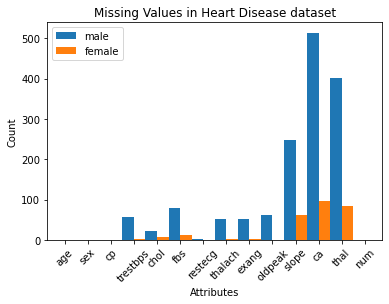

In [3]:
# visualize missing values between male and female
data_male = data[data['sex'] == 1]
data_female = data[data['sex'] == 0]

data_male_miss = data_male.isnull().sum()
data_female_miss = data_female.isnull().sum()

sex_miss = pd.concat([data_male_miss, data_female_miss], axis=1, keys=["male", "female"])

missplot = sex_miss.plot.bar(rot=45, width=1, title='Missing Values in Heart Disease dataset', xlabel='Attributes', ylabel='Count')

In [4]:
# calculate means for each continuous variable for both male and female
means_male = data_male.mean()
means_female = data_female.mean()

means = pd.DataFrame([means_male, means_female])
means.index = ['male', 'female']
means = means.drop(['age','sex','cp','fbs', 'restecg','exang','slope','thal','num','ca'], axis=1)
means

,trestbps,chol,thalach,oldpeak
male,132.143498,187.864865,135.063893,0.939850
female,132.093750,241.481283,146.244792,0.668394


In [5]:
# delete variables where is no difference in male and female
data_imp = data.copy()
data_imp = data_imp.drop(columns=['trestbps'])

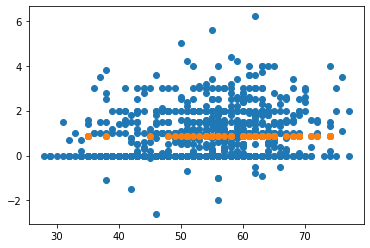

In [6]:
# mean imputation
data_imp['chol'] = data_imp['chol'].fillna(data_imp['chol'].mean())
data_imp['thalach'] = data_imp['thalach'].fillna(data_imp['thalach'].mean())
data_imp['oldpeak'] = data_imp['oldpeak'].fillna(data_imp['oldpeak'].mean())
null_values = data['oldpeak'].isnull()
# visualize results
plot = plt.scatter(data_imp['age'], data_imp['oldpeak'])
plot = plt.scatter(data_imp[np.isnan(data['oldpeak'])]['age'], data_imp[np.isnan(data['oldpeak'])]['oldpeak'])
plt.show()

In [7]:
# calculate modes for each categorial variable for both male and female
modes_male = data_male.mode().iloc[0]
modes_female = data_female.mode().iloc[0]

modes = pd.DataFrame([modes_male, modes_female])
modes.index = ['male', 'female']
modes = modes.drop(['age','sex','trestbps','chol','thalach','oldpeak','num'], axis=1)
modes

,cp,fbs,restecg,exang,slope,ca,thal
male,4.0,0.0,0.0,0.0,2.0,0.0,7.0
female,4.0,0.0,0.0,0.0,2.0,0.0,3.0


In [8]:
# delete variables where is no difference in male and female
data_imp = data_imp.drop(columns=['cp','fbs','restecg','exang','slope','ca'])

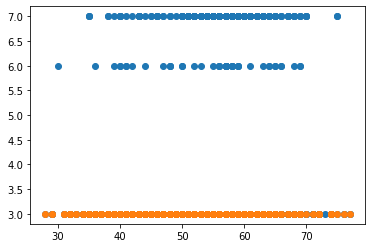

In [9]:
# mode imputation
data_imp['thal'] = data_imp['thal'].fillna(int(data_imp['thal'].mode()))
null_values = data['thal'].isnull()

# save results
from pathlib import Path  
filepath = Path('../data/data_imp.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data_imp.to_csv(filepath, index=False)

# visualize results
plot = plt.scatter(data_imp['age'], data_imp['thal'])
plot = plt.scatter(data_imp[np.isnan(data['thal'])]['age'], data_imp[np.isnan(data['thal'])]['thal'])
plt.show()

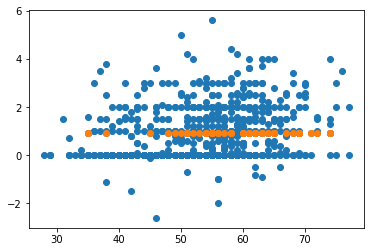

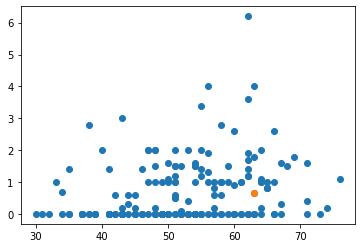

In [10]:
# mean imputation for subgroups
data_imp_male = data[data['sex']==1].copy()
data_imp_female = data[data['sex']==0].copy()

data_imp_male['oldpeak'] = data_imp_male['oldpeak'].fillna(data_imp_male['oldpeak'].mean())
data_imp_female['oldpeak'] = data_imp_female['oldpeak'].fillna(data_imp_female['oldpeak'].mean())

# visualize results
plot = plt.scatter(data_imp_male['age'], data_imp_male['oldpeak'])
plot = plt.scatter(data_imp_male[np.isnan(data[data['sex']==1].copy()['oldpeak'])]['age'], 
                   data_imp_male[np.isnan(data[data['sex']==1].copy()['oldpeak'])]['oldpeak'])
plt.show()

plot = plt.scatter(data_imp_female['age'], data_imp_female['oldpeak'])
plot = plt.scatter(data_imp_female[np.isnan(data[data['sex']==0]['oldpeak'])]['age'], 
                   data_imp_female[np.isnan(data[data['sex']==0]['oldpeak'])]['oldpeak'])
plt.show()